# **1. Import libraries**

In [ ]:
## Data handling
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)

## Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
plt.style.use('ggplot')
sns.set_style('whitegrid')

## Missing values visualization
import missingno as ms

## Stats
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import shapiro

## Warnings
import warnings
warnings.filterwarnings('ignore')

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# **2. Load data**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Sales Order/sales_data.csv')
data.head()

,Order Date,Order ID,Product,Product_ean,catégorie,Purchase Address,Quantity Ordered,Price Each,Cost price,turnover,margin
0,2019-01-22 21:25:00,141234,iPhone,5.638009e+12,Vêtements,"944 Walnut St, Boston, MA 02215",1,700.00,231.0000,700.00,469.0000
1,2019-01-28 14:15:00,141235,Lightning Charging Cable,5.563320e+12,Alimentation,"185 Maple St, Portland, OR 97035",1,14.95,7.4750,14.95,7.4750
2,2019-01-17 13:33:00,141236,Wired Headphones,2.113973e+12,Vêtements,"538 Adams St, San Francisco, CA 94016",2,11.99,5.9950,23.98,11.9900
3,2019-01-05 20:33:00,141237,27in FHD Monitor,3.069157e+12,Sports,"738 10th St, Los Angeles, CA 90001",1,149.99,97.4935,149.99,52.4965
4,2019-01-25 11:59:00,141238,Wired Headphones,9.692681e+12,Électronique,"387 10th St, Austin, TX 73301",1,11.99,5.9950,11.99,5.9950


In [ ]:
## Data set size
print(f'The data set have {data.shape[0]} rows and {data.shape[1]} columns')

The data set have 185950 rows and 11 columns


In [ ]:
## Data set information
print("**"*30)
print(" "*19, "Data set Information")
print("**"*30)
print(data.info())

************************************************************
                    Data set Information
************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order Date        185950 non-null  object 
 1   Order ID          185950 non-null  int64  
 2   Product           185950 non-null  object 
 3   Product_ean       185950 non-null  float64
 4   catégorie         185950 non-null  object 
 5   Purchase Address  185950 non-null  object 
 6   Quantity Ordered  185950 non-null  int64  
 7   Price Each        185950 non-null  float64
 8   Cost price        185950 non-null  float64
 9   turnover          185950 non-null  float64
 10  margin            185950 non-null  float64
dtypes: float64(5), int64(2), object(4)
memory usage: 15.6+ MB
None


# **3. EDA**

In [ ]:
## Set the names of the columns

data.columns = data.columns.str.strip()
data.columns = data.columns.str.replace(' ', '_')
data.columns

Index(['Order_Date', 'Order_ID', 'Product', 'Product_ean', 'catégorie',
       'Purchase_Address', 'Quantity_Ordered', 'Price_Each', 'Cost_price',
       'turnover', 'margin'],
      dtype='object')

In [ ]:
## Checking duplicate rows
print(f'There are {data.duplicated().sum()} duplicate rows')

There are 0 duplicate rows


Perfect!!, there are no duplicate rows.

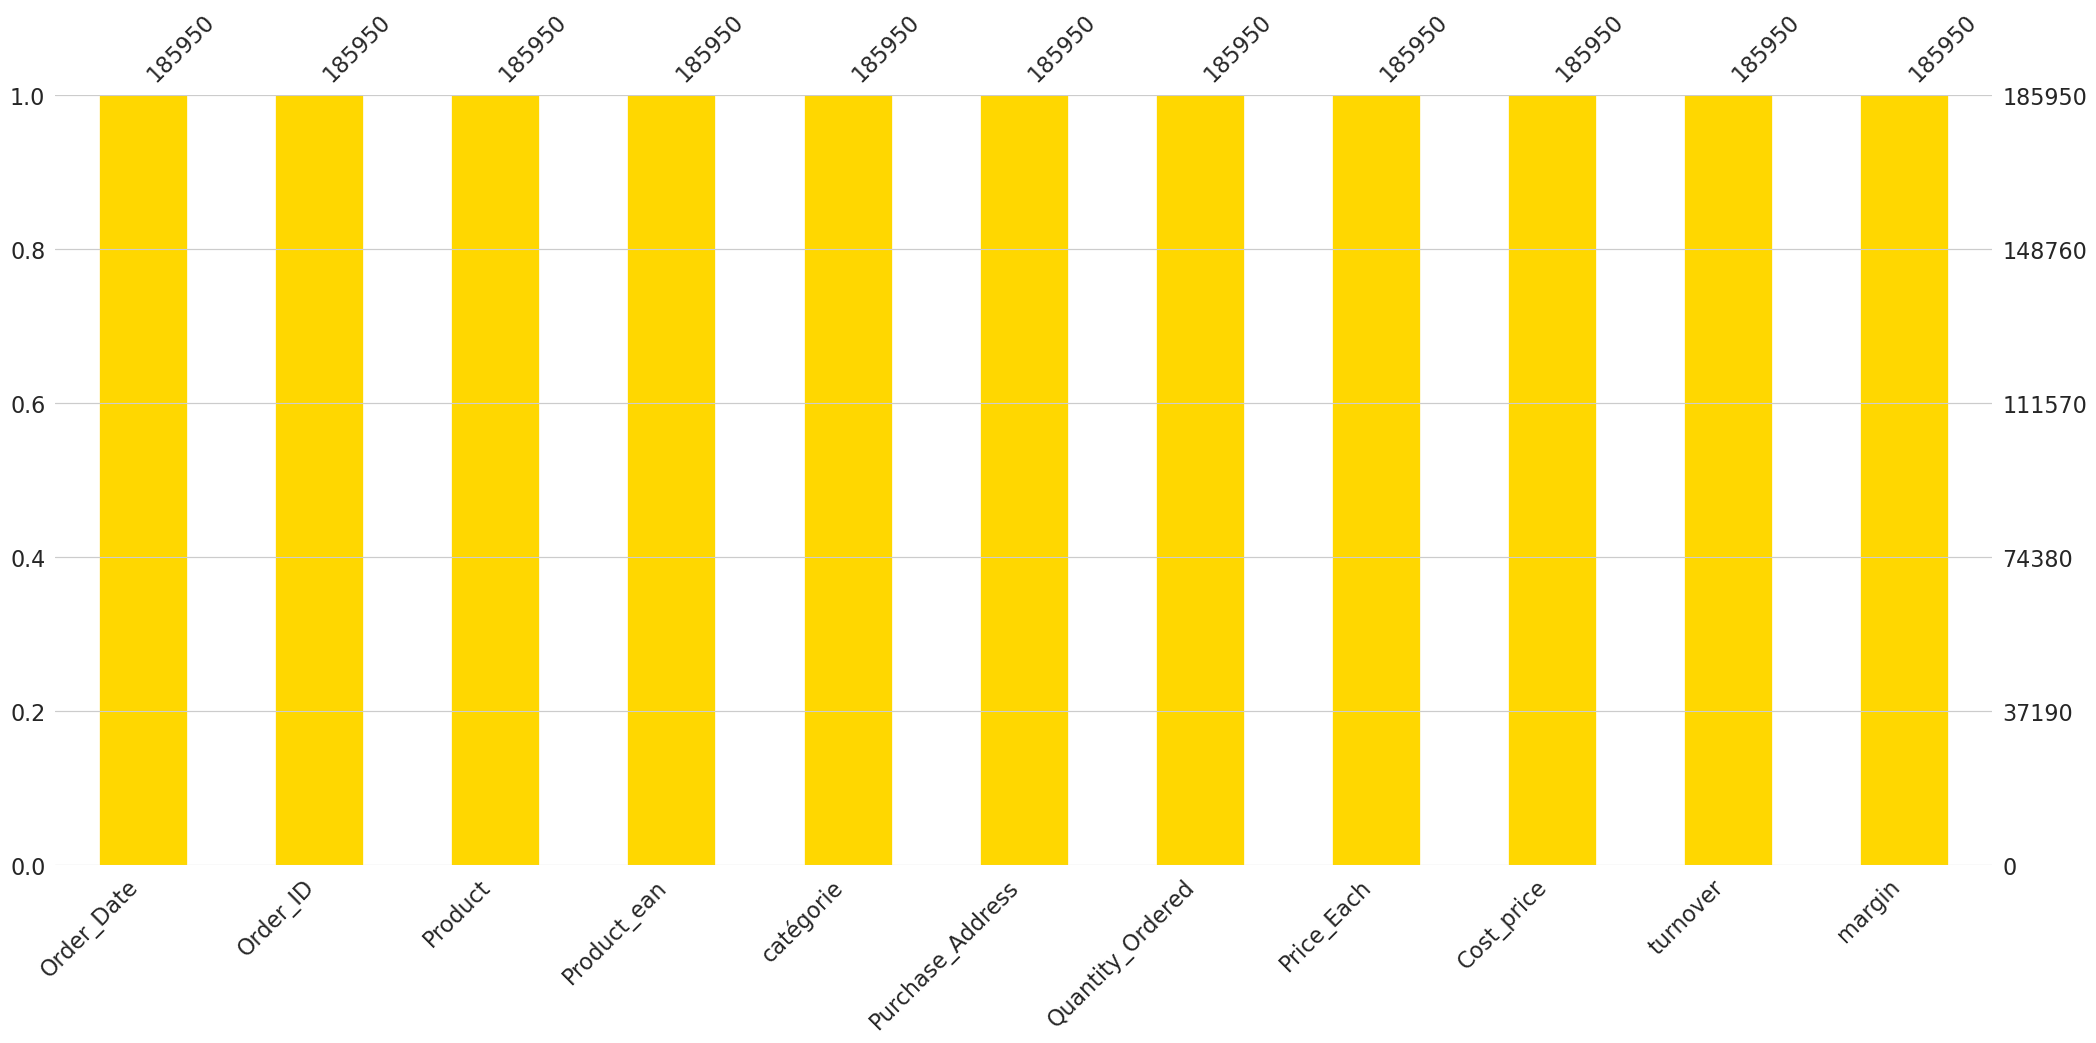

In [ ]:
## Checking null values
ms.bar(data, color = 'gold')
plt.show()

Great!!, there is no presence of null values.

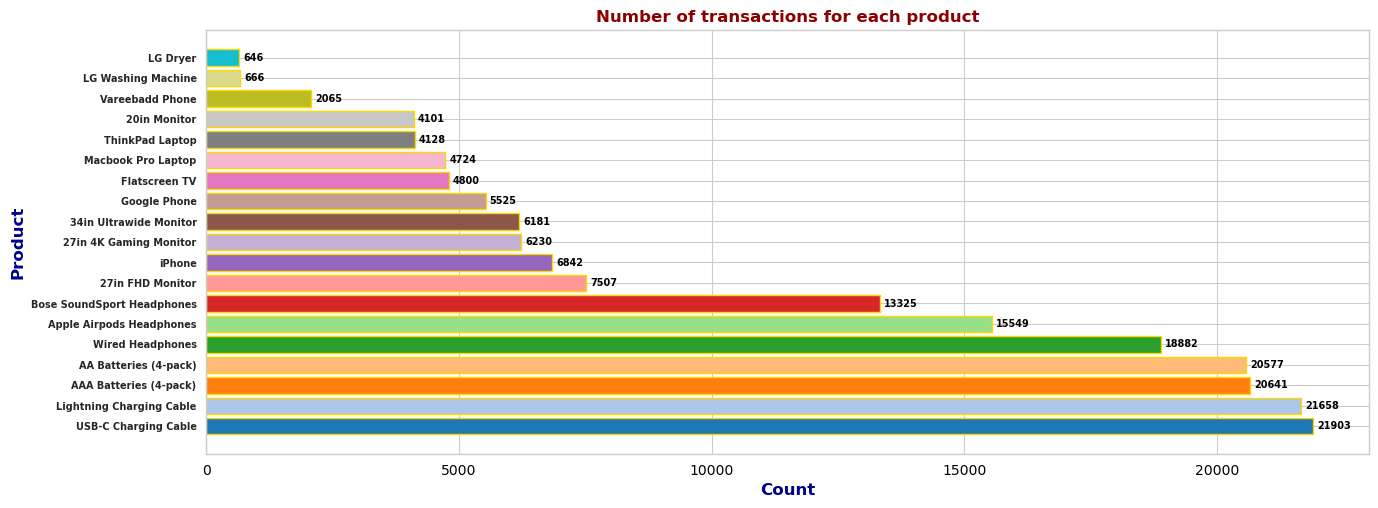

In [ ]:
df_popu_prod = data['Product'].value_counts().to_frame()

labels = df_popu_prod.index.to_list()
values = df_popu_prod.iloc[:,0].values

cmap = plt.get_cmap('tab20')
colors = cmap(np.arange(len(labels)))

fig,ax = plt.subplots(figsize = (15,5.5))
rects = ax.barh(labels, values, linewidth = 1. , edgecolor = 'gold', color = colors)
ax.set_xlabel('Count', fontsize = 12, fontweight = 'bold', color = 'darkblue')
ax.set_ylabel('Product', fontsize = 12, fontweight = 'bold', color = 'darkblue')
ax.set_yticklabels(labels, fontsize = 7, fontweight = 'bold')
ax.tick_params('x', labelcolor = 'black')
ax.set_title('Number of transactions for each product', fontsize = 12, fontweight = 'bold', color = 'darkred')

def autolabel(rects):
  for rect in rects:
    width = rect.get_width()
    ax.annotate(text = '{}'.format(width),
                xy = (width, rect.get_y() + rect.get_height()/2),
                xytext = (3,0),
                textcoords = 'offset points',
                ha = 'left',
                va = 'center',
                weight = 'bold',
                size = 7,
                color = 'black')

autolabel(rects)
fig.show()

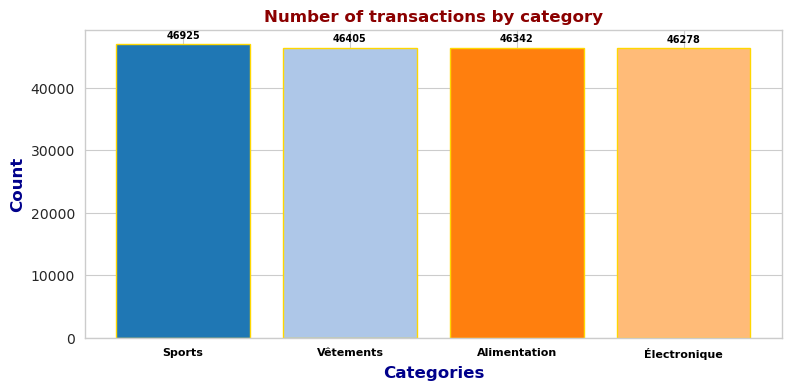

In [ ]:
df_popu_categ = data['catégorie'].value_counts().to_frame()

labels = df_popu_categ.index.to_list()
values = df_popu_categ.iloc[:,0].values

cmap = plt.get_cmap('tab20')
colors = cmap(np.arange(len(labels)))

fig,ax = plt.subplots(figsize = (9,4))
rects = ax.bar(labels, values, linewidth = 1. , edgecolor = 'gold', color = colors)
ax.set_ylabel('Count', fontsize = 12, fontweight = 'bold', color = 'darkblue')
ax.set_xlabel('Categories', fontsize = 12, fontweight = 'bold', color = 'darkblue')
ax.set_xticklabels(labels, fontsize = 8, fontweight = 'bold')
ax.tick_params('x', labelcolor = 'black')
ax.set_title('Number of transactions by category', fontsize = 12, fontweight = 'bold', color = 'darkred')

def autolabel(rects):
  for rect in rects:
    height = rect.get_height()
    ax.annotate(text = '{}'.format(height),
                xy = (rect.get_x() + rect.get_width()/2, height),
                xytext = (0,3),
                textcoords = 'offset points',
                ha = 'center',
                va = 'bottom',
                weight = 'bold',
                size = 7,
                color = 'black')

autolabel(rects)
fig.show()

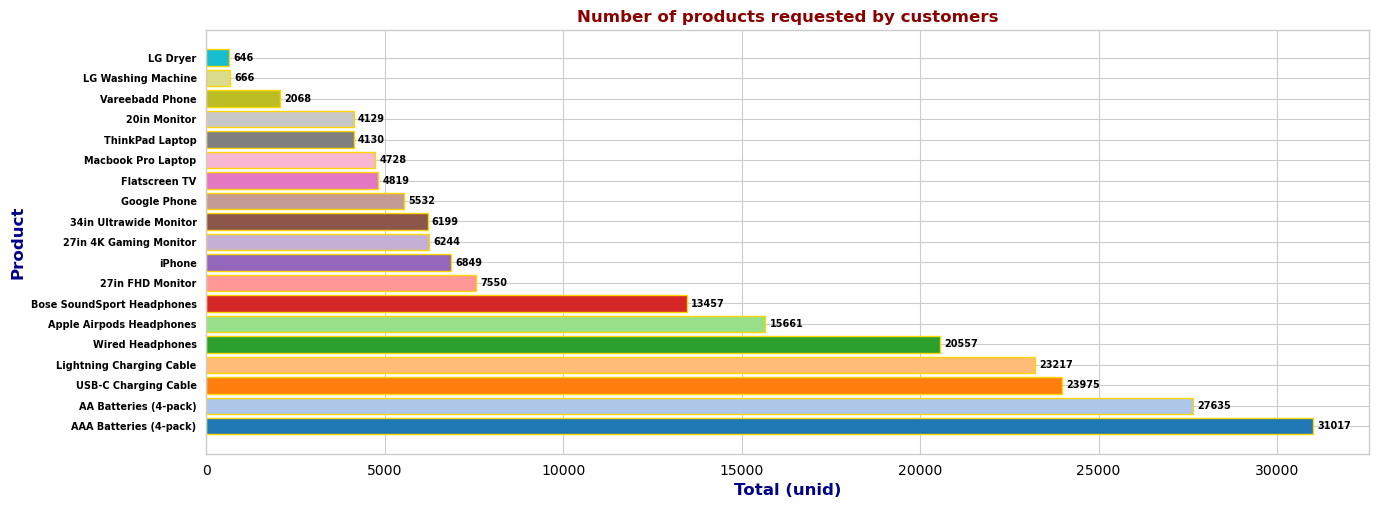

In [ ]:
df_prod_quant = data.groupby('Product')['Quantity_Ordered'].sum().to_frame().sort_values('Quantity_Ordered', ascending = False)

labels = df_prod_quant.index.to_list()
values = df_prod_quant['Quantity_Ordered'].values


cmap = plt.get_cmap('tab20')
colors = cmap(np.arange(len(labels)))

fig,ax = plt.subplots(figsize = (15,5.5))

rects = ax.barh(labels, values, linewidth = 1. , edgecolor = 'gold', color = colors)
ax.set_xlabel('Total (unid)', fontsize = 12, fontweight = 'bold', color = 'darkblue')
ax.set_ylabel('Product', fontsize = 12, fontweight = 'bold', color = 'darkblue')
ax.set_yticklabels(labels, fontweight = 'bold', fontsize = 7, color = 'black')
ax.tick_params('x', labelcolor = 'black')
ax.set_title('Number of products requested by customers', fontsize = 12, fontweight = 'bold', color = 'darkred')

def autolabel(rects):
  for rect in rects:
    width = rect.get_width()
    ax.annotate(text = f'{width}',
                xy = (width, rect.get_y() + rect.get_height()/2),
                xytext = (3,0),
                textcoords = 'offset points',
                ha = 'left',
                va = 'center',
                weight = 'bold',
                color = 'black',
                size = 7)

autolabel(rects)

fig.show()


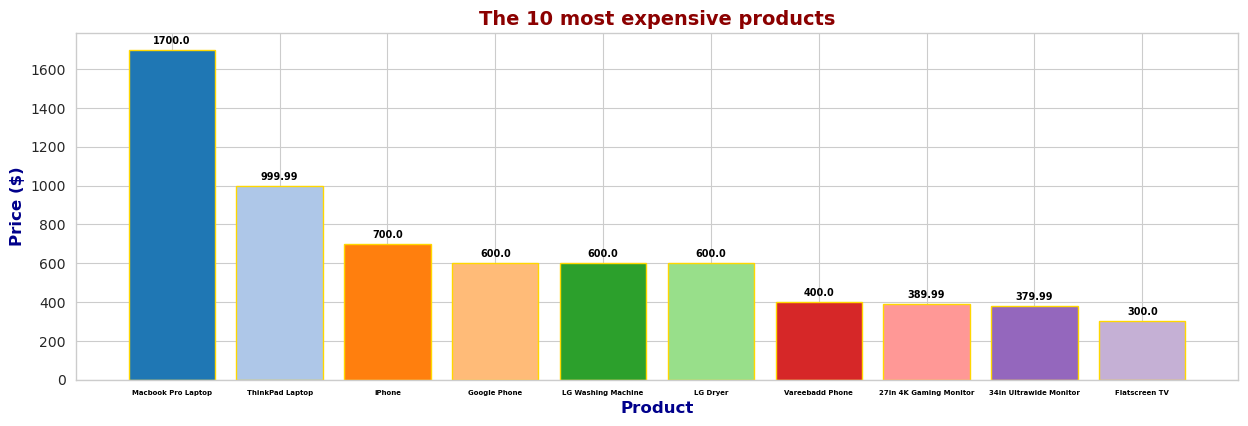

In [ ]:
df_prod_price = data[['Product', 'Price_Each']].sort_values('Price_Each', ascending = False).drop_duplicates().head(10)

labels = df_prod_price['Product'].to_list()
values = df_prod_price['Price_Each'].values

cmap = plt.get_cmap('tab20')
colors = cmap(np.arange(len(labels)))

fig,ax = plt.subplots(figsize = (15,4.5))
rects = ax.bar(labels, values, color = colors, linewidth = 1., edgecolor = 'gold')
ax.set_xticklabels(labels, fontsize = 5, color = 'black', fontweight = 'bold')
ax.set_ylabel('Price ($)', fontsize = 12, fontweight = 'bold', color = 'darkblue')
ax.set_xlabel('Product', fontsize = 12, fontweight = 'bold', color = 'darkblue')
ax.set_title('The 10 most expensive products', fontsize = 14, fontweight = 'bold', color = 'darkred')

def autolabel(rects):
  for rect in rects:
    height = rect.get_height()
    ax.annotate(text = f'{height}',
                xy = (rect.get_x() + rect.get_width()/2, height),
                xytext = (0,3),
                textcoords = 'offset points',
                ha = 'center',
                va = 'bottom',
                color = 'black',
                weight = 'bold',
                size = 7)
autolabel(rects)
fig.show()

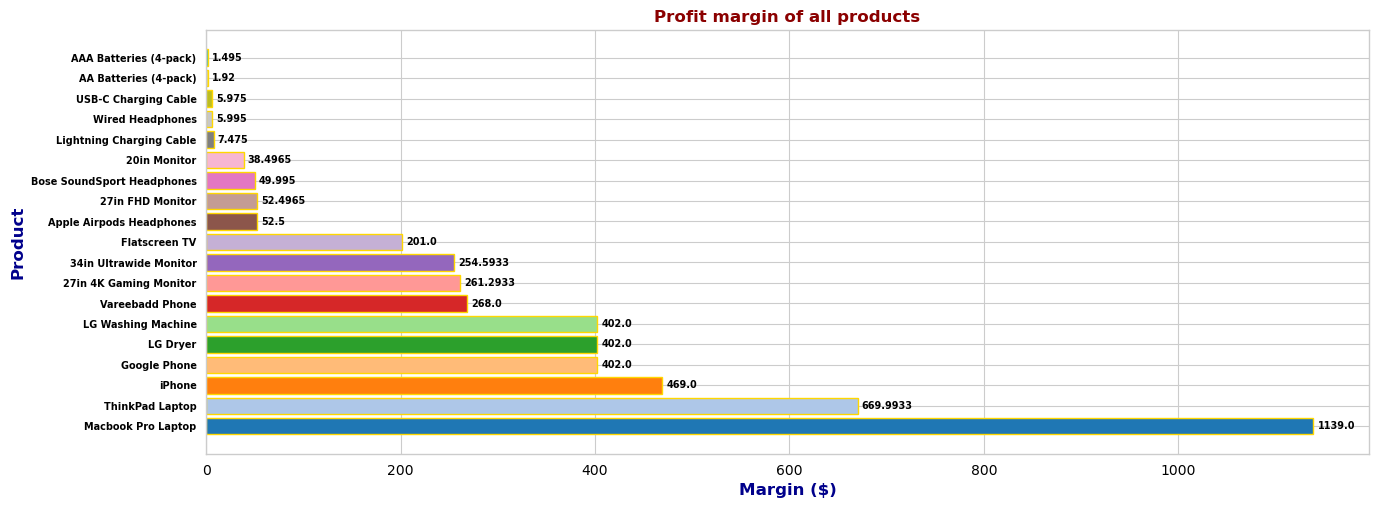

In [ ]:
df_prod_margin = data[data['Quantity_Ordered']  == 1][['Product', 'margin']].sort_values('margin', ascending = False).drop_duplicates()

labels = df_prod_margin['Product']
values = df_prod_margin['margin'].values


cmap = plt.get_cmap('tab20')
colors = cmap(np.arange(len(labels)))

fig,ax = plt.subplots(figsize = (15,5.5))

rects = ax.barh(labels, values, linewidth = 1. , edgecolor = 'gold', color = colors)
ax.set_xlabel('Margin ($)', fontsize = 12, fontweight = 'bold', color = 'darkblue')
ax.set_ylabel('Product', fontsize = 12, fontweight = 'bold', color = 'darkblue')
ax.set_yticklabels(labels, fontweight = 'bold', fontsize = 7, color = 'black')
ax.tick_params('x', labelcolor = 'black')
ax.set_title('Profit margin of all products', fontsize = 12, fontweight = 'bold', color = 'darkred')

def autolabel(rects):
  for rect in rects:
    width = rect.get_width()
    ax.annotate(text = f'{width}',
                xy = (width, rect.get_y() + rect.get_height()/2),
                xytext = (3,0),
                textcoords = 'offset points',
                ha = 'left',
                va = 'center',
                weight = 'bold',
                color = 'black',
                size = 7)

autolabel(rects)

fig.show()

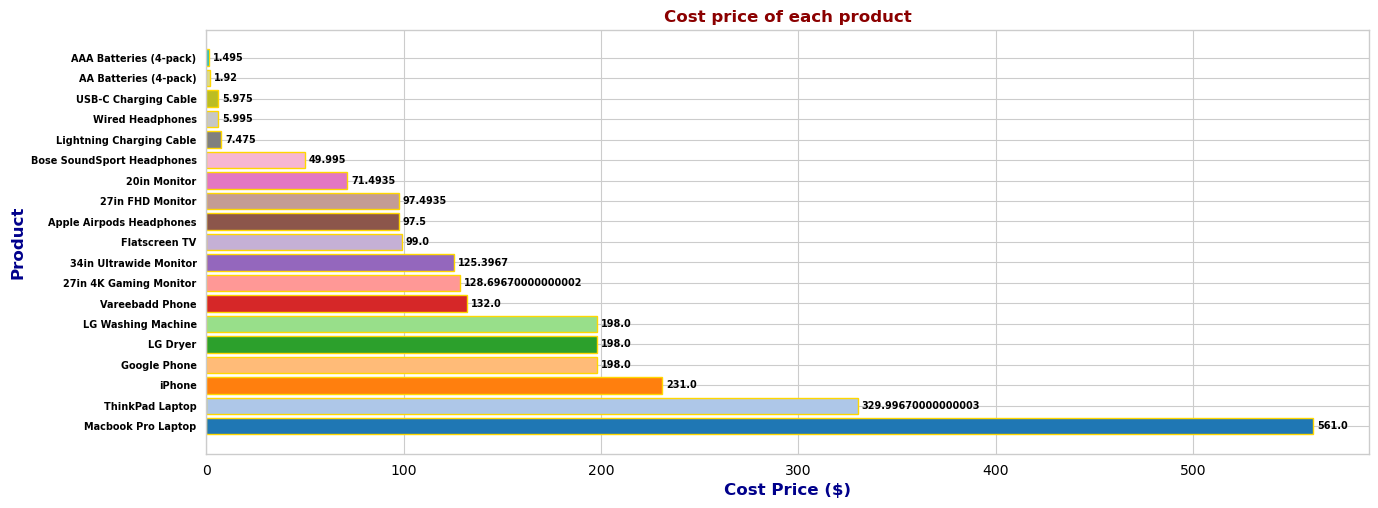

In [ ]:
df_prod_cost = data[data['Quantity_Ordered']  == 1][['Product', 'Cost_price']].sort_values('Cost_price', ascending = False).drop_duplicates()

labels = df_prod_cost['Product']
values = df_prod_cost['Cost_price'].values


cmap = plt.get_cmap('tab20')
colors = cmap(np.arange(len(labels)))

fig,ax = plt.subplots(figsize = (15,5.5))

rects = ax.barh(labels, values, linewidth = 1. , edgecolor = 'gold', color = colors)
ax.set_xlabel('Cost Price ($)', fontsize = 12, fontweight = 'bold', color = 'darkblue')
ax.set_ylabel('Product', fontsize = 12, fontweight = 'bold', color = 'darkblue')
ax.set_yticklabels(labels, fontweight = 'bold', fontsize = 7, color = 'black')
ax.tick_params('x', labelcolor = 'black')
ax.set_title('Cost price of each product', fontsize = 12, fontweight = 'bold', color = 'darkred')

def autolabel(rects):
  for rect in rects:
    width = rect.get_width()
    ax.annotate(text = f'{width}',
                xy = (width, rect.get_y() + rect.get_height()/2),
                xytext = (3,0),
                textcoords = 'offset points',
                ha = 'left',
                va = 'center',
                weight = 'bold',
                color = 'black',
                size = 7)

autolabel(rects)

fig.show()

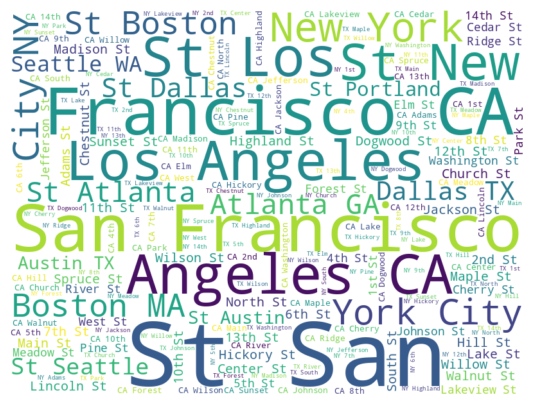

In [ ]:
# WordCloud of Purchase Address
all_text = ' '.join(data['Purchase_Address'])

wordcloud = WordCloud(width = 800, height = 600, background_color = 'white').generate(all_text)

plt.figure(figsize=(9, 5))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.grid(False)
plt.axis('off')
plt.show()

In [ ]:
df_total_sales = data[['Product', 'Quantity_Ordered', 'Price_Each']]
df_total_sales['total_sales'] = df_total_sales['Price_Each']*df_total_sales['Quantity_Ordered']
df_total_sales.head()

,Product,Quantity_Ordered,Price_Each,total_sales
0,iPhone,1,700.00,700.00
1,Lightning Charging Cable,1,14.95,14.95
2,Wired Headphones,2,11.99,23.98
3,27in FHD Monitor,1,149.99,149.99
4,Wired Headphones,1,11.99,11.99


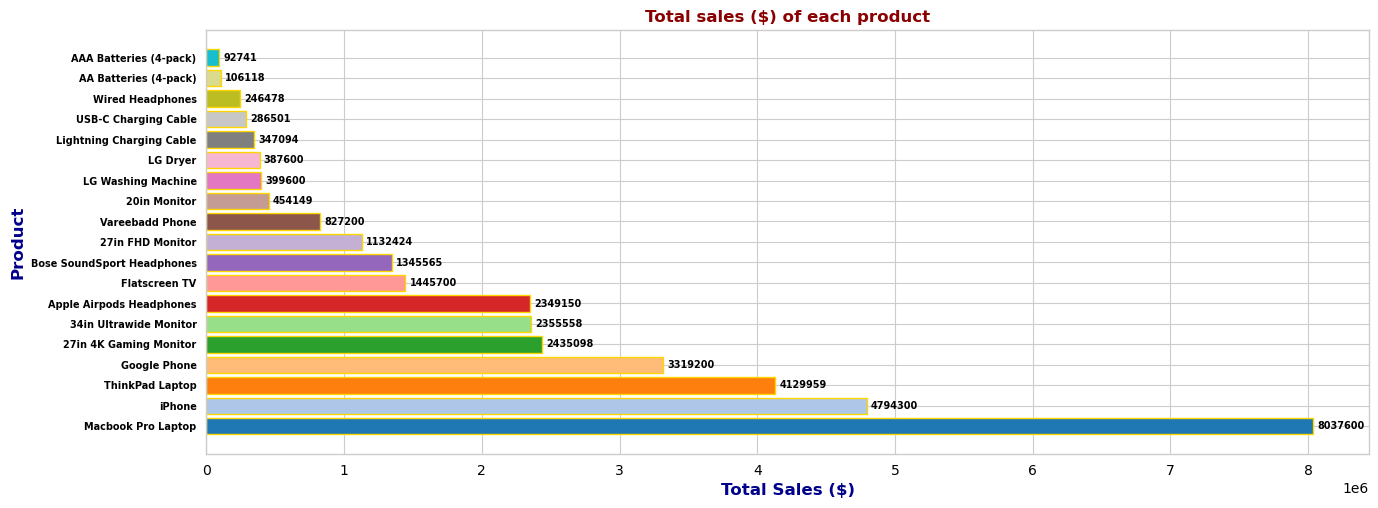

In [ ]:
df_total_sales_prod = df_total_sales.groupby('Product')['total_sales'].sum().to_frame().sort_values('total_sales', ascending = False)
labels = df_total_sales_prod.index.to_list()
values = df_total_sales_prod['total_sales'].values


cmap = plt.get_cmap('tab20')
colors = cmap(np.arange(len(labels)))

fig,ax = plt.subplots(figsize = (15,5.5))

rects = ax.barh(labels, values, linewidth = 1. , edgecolor = 'gold', color = colors)
ax.set_xlabel('Total Sales ($)', fontsize = 12, fontweight = 'bold', color = 'darkblue')
ax.set_ylabel('Product', fontsize = 12, fontweight = 'bold', color = 'darkblue')
ax.set_yticklabels(labels, fontweight = 'bold', fontsize = 7, color = 'black')
ax.tick_params('x', labelcolor = 'black')
ax.set_title('Total sales ($) of each product', fontsize = 12, fontweight = 'bold', color = 'darkred')

def autolabel(rects):
  for rect in rects:
    width = rect.get_width()
    ax.annotate(text = f'{round(width)}',
                xy = (width, rect.get_y() + rect.get_height()/2),
                xytext = (3,0),
                textcoords = 'offset points',
                ha = 'left',
                va = 'center',
                weight = 'bold',
                color = 'black',
                size = 7)

autolabel(rects)

fig.show()

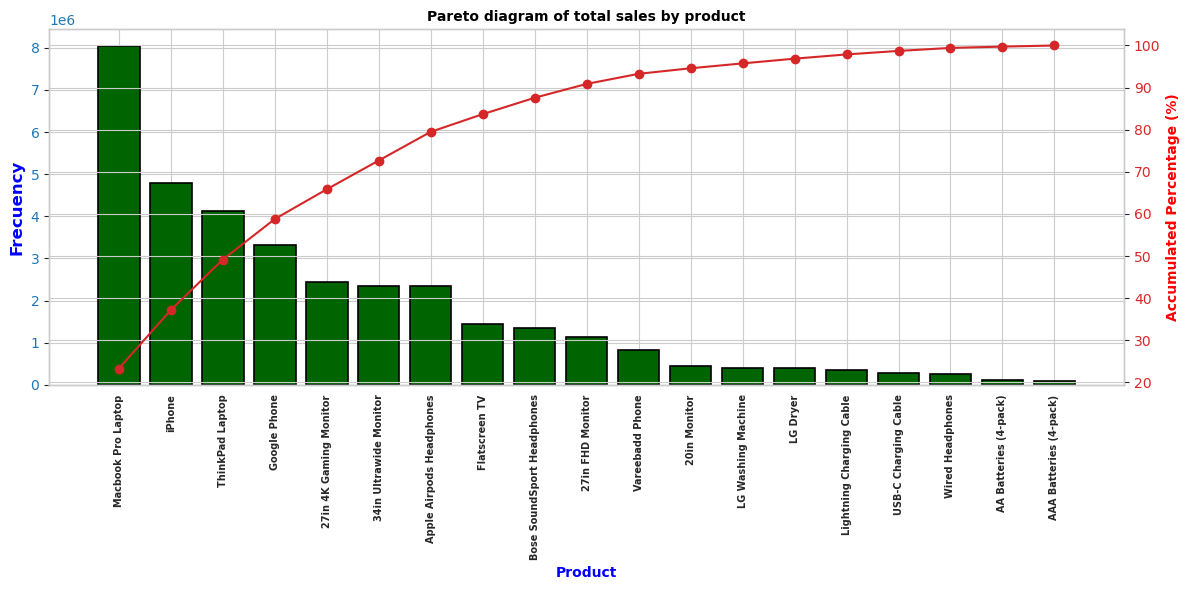

In [ ]:
df_total_sales_prod = df_total_sales.groupby('Product')['total_sales'].sum().to_frame().sort_values('total_sales', ascending = False)
df_total_sales_prod['total_sales_cum']= df_total_sales_prod.cumsum()
df_total_sales_prod['%_total_sales'] = (df_total_sales_prod['total_sales']/sum(df_total_sales_prod['total_sales']))*100
df_total_sales_prod['%_total_sales_cum'] = df_total_sales_prod['%_total_sales'].cumsum()

categories = df_total_sales_prod.index.to_list()
values = df_total_sales_prod.iloc[:,0].to_list()
cumulative_percentages = df_total_sales_prod.iloc[:,3].to_list()

fig, ax1 = plt.subplots(figsize=(12,6))

ax1.bar(categories, values, color='darkgreen', linewidth = 1.2, edgecolor = 'black')
ax1.set_xlabel('Product', color = 'blue', fontsize = 10, fontweight = 'bold')
ax1.set_ylabel('Frecuency', color='blue', fontsize = 12, fontweight = 'bold')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.set_xticklabels(categories, weight = 'bold')
ax1.tick_params(axis = 'x', rotation = 90, labelsize = 7)


ax2 = ax1.twinx()
ax2.plot(categories, cumulative_percentages, color='tab:red', marker='o')
ax2.set_ylabel('Accumulated Percentage (%)', color='red', fontsize = 10, fontweight = 'bold')
ax2.tick_params(axis='y', labelcolor='tab:red')

ax1.set_title('Pareto diagram of total sales by product', fontsize = 10, fontweight = 'bold', color = 'black')
fig.tight_layout()
fig.show()

In [ ]:
# Set the 'Order Date' column to datetime64 format
data['Order_Date'] = pd.to_datetime(data['Order_Date'])

In [ ]:
# We generate a copy of our data so as not to generate any columns.
data_new = data.copy()

In [ ]:
# Create a column called 'Hour'.
data_new['Hour'] = data_new['Order_Date'].dt.hour # we extract the time

In [ ]:
# Create a column called 'Day'
data_new['Day'] = data_new['Order_Date'].dt.day_name() # We extract the day of the week.

In [ ]:
# Create a column called 'Month'
data_new['Month'] = data_new['Order_Date'].dt.month_name() # we extract the month

In [ ]:
# Create a column called 'Year'
data_new['Year'] = data_new['Order_Date'].dt.year # extraemos el año.

In [ ]:
# We display the new dataframe.
data_new.head()

,Order_Date,Order_ID,Product,Product_ean,catégorie,Purchase_Address,Quantity_Ordered,Price_Each,Cost_price,turnover,margin,Hour,Day,Month,Year
0,2019-01-22 21:25:00,141234,iPhone,5.638009e+12,Vêtements,"944 Walnut St, Boston, MA 02215",1,700.00,231.0000,700.00,469.0000,21,Tuesday,January,2019
1,2019-01-28 14:15:00,141235,Lightning Charging Cable,5.563320e+12,Alimentation,"185 Maple St, Portland, OR 97035",1,14.95,7.4750,14.95,7.4750,14,Monday,January,2019
2,2019-01-17 13:33:00,141236,Wired Headphones,2.113973e+12,Vêtements,"538 Adams St, San Francisco, CA 94016",2,11.99,5.9950,23.98,11.9900,13,Thursday,January,2019
3,2019-01-05 20:33:00,141237,27in FHD Monitor,3.069157e+12,Sports,"738 10th St, Los Angeles, CA 90001",1,149.99,97.4935,149.99,52.4965,20,Saturday,January,2019
4,2019-01-25 11:59:00,141238,Wired Headphones,9.692681e+12,Électronique,"387 10th St, Austin, TX 73301",1,11.99,5.9950,11.99,5.9950,11,Friday,January,2019


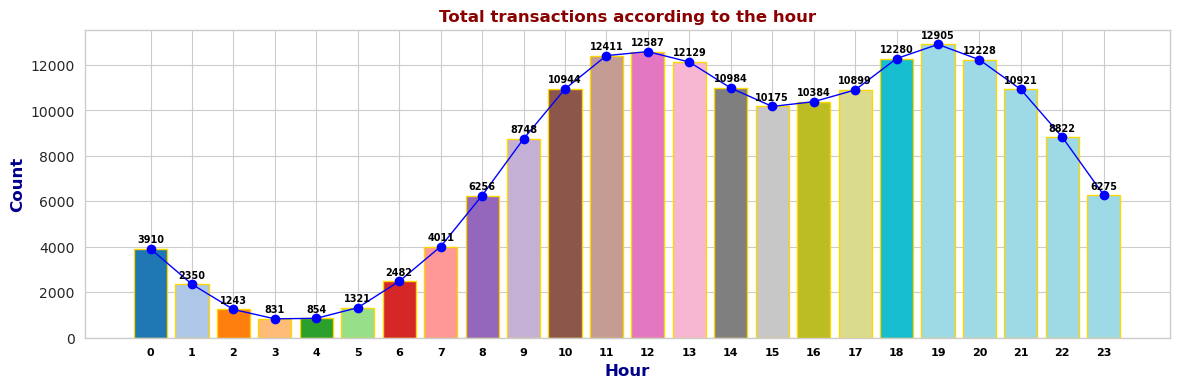

In [ ]:
df_popu_hour = data_new['Hour'].value_counts().to_frame().sort_index()
df_popu_hour.index = df_popu_hour.index.astype('str')

labels = df_popu_hour.index.to_list()
values = df_popu_hour.iloc[:,0].values

cmap = plt.get_cmap('tab20')
colors = cmap(np.arange(len(labels)))

fig,ax = plt.subplots(figsize = (14,4))
rects = ax.bar(labels, values, linewidth = 1. , edgecolor = 'gold', color = colors)
ax.plot(labels, values, '-o', linewidth = 1., color = 'blue')
ax.set_ylabel('Count', fontsize = 12, fontweight = 'bold', color = 'darkblue')
ax.set_xlabel('Hour', fontsize = 12, fontweight = 'bold', color = 'darkblue')
ax.set_xticklabels(labels, fontsize = 8, fontweight = 'bold')
ax.tick_params('x', labelcolor = 'black')
ax.set_title('Total transactions according to the hour', fontsize = 12, fontweight = 'bold', color = 'darkred')

def autolabel(rects):
  for rect in rects:
    height = rect.get_height()
    ax.annotate(text = '{}'.format(height),
                xy = (rect.get_x() + rect.get_width()/2, height),
                xytext = (0,3),
                textcoords = 'offset points',
                ha = 'center',
                va = 'bottom',
                weight = 'bold',
                size = 7,
                color = 'black')

autolabel(rects)
fig.show()

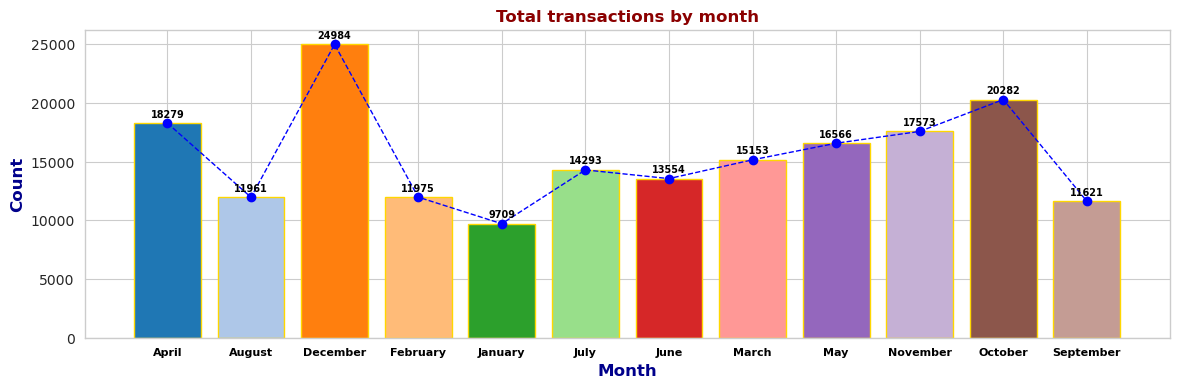

In [ ]:
df_popu_month = data_new['Month'].value_counts().to_frame().sort_index()
df_popu_month.index = df_popu_month.index.astype('str')

labels = df_popu_month.index.to_list()
values = df_popu_month.iloc[:,0].values

cmap = plt.get_cmap('tab20')
colors = cmap(np.arange(len(labels)))

fig,ax = plt.subplots(figsize = (14,4))
rects = ax.bar(labels, values, linewidth = 1. , edgecolor = 'gold', color = colors)
ax.plot(labels, values, '--o', linewidth = 1., color = 'blue')
ax.set_ylabel('Count', fontsize = 12, fontweight = 'bold', color = 'darkblue')
ax.set_xlabel('Month', fontsize = 12, fontweight = 'bold', color = 'darkblue')
ax.set_xticklabels(labels, fontsize = 8, fontweight = 'bold')
ax.tick_params('x', labelcolor = 'black')
ax.set_title('Total transactions by month', fontsize = 12, fontweight = 'bold', color = 'darkred')

def autolabel(rects):
  for rect in rects:
    height = rect.get_height()
    ax.annotate(text = '{}'.format(height),
                xy = (rect.get_x() + rect.get_width()/2, height),
                xytext = (0,3),
                textcoords = 'offset points',
                ha = 'center',
                va = 'bottom',
                weight = 'bold',
                size = 7,
                color = 'black')

autolabel(rects)
fig.show()

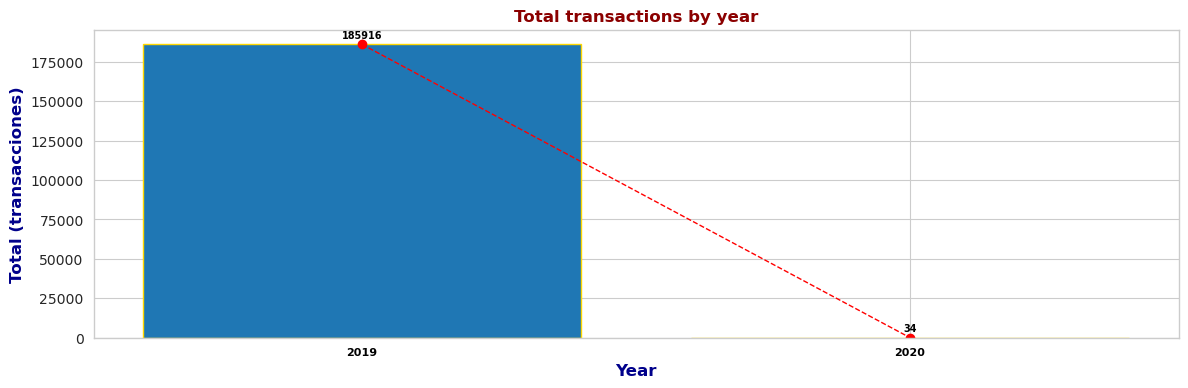

In [ ]:
df_popu_year = data_new['Year'].value_counts().to_frame().sort_index()
df_popu_year.index = df_popu_year.index.astype('str')

labels = df_popu_year.index.to_list()
values = df_popu_year.iloc[:,0].values

cmap = plt.get_cmap('tab20')
colors = cmap(np.arange(len(labels)))

fig,ax = plt.subplots(figsize = (14,4))
rects = ax.bar(labels, values, linewidth = 1. , edgecolor = 'gold', color = colors)
ax.plot(labels, values, '--o', linewidth = 1., color = 'red')
ax.set_ylabel('Total (transacciones)', fontsize = 12, fontweight = 'bold', color = 'darkblue')
ax.set_xlabel('Year', fontsize = 12, fontweight = 'bold', color = 'darkblue')
ax.set_xticklabels(labels, fontsize = 8, fontweight = 'bold')
ax.tick_params('x', labelcolor = 'black')
ax.set_title('Total transactions by year', fontsize = 12, fontweight = 'bold', color = 'darkred')

def autolabel(rects):
  for rect in rects:
    height = rect.get_height()
    ax.annotate(text = '{}'.format(height),
                xy = (rect.get_x() + rect.get_width()/2, height),
                xytext = (0,3),
                textcoords = 'offset points',
                ha = 'center',
                va = 'bottom',
                weight = 'bold',
                size = 7,
                color = 'black')

autolabel(rects)
fig.show()

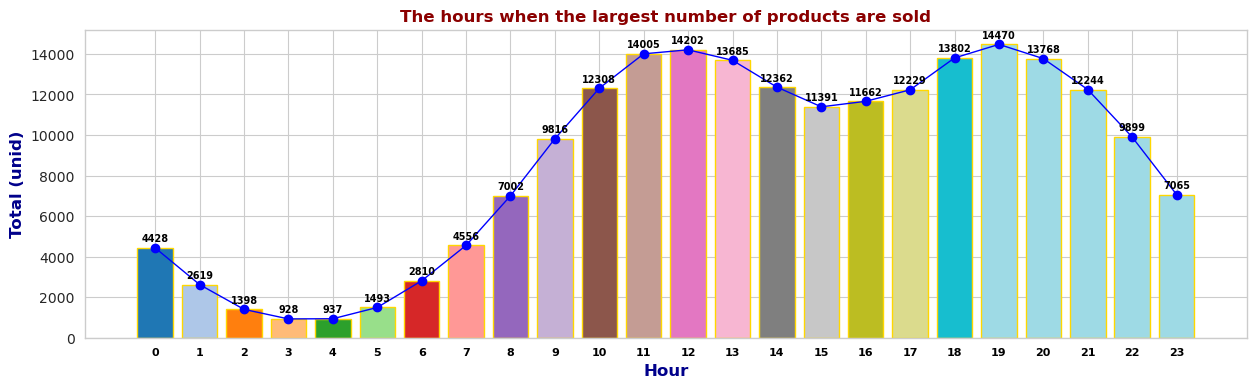

In [ ]:
df_hour_quantity = data_new.groupby('Hour')['Quantity_Ordered'].sum().to_frame()
df_hour_quantity.index = df_hour_quantity.index.astype('str')

labels = df_hour_quantity.index.to_list()
values = df_hour_quantity.iloc[:,0].values

cmap = plt.get_cmap('tab20')
colors = cmap(np.arange(len(labels)))

fig,ax = plt.subplots(figsize = (15,4))
rects = ax.bar(labels, values, linewidth = 1. , edgecolor = 'gold', color = colors)
ax.plot(labels, values, '-o', linewidth = 1., color = 'blue')
ax.set_ylabel('Total (unid)', fontsize = 12, fontweight = 'bold', color = 'darkblue')
ax.set_xlabel('Hour', fontsize = 12, fontweight = 'bold', color = 'darkblue')
ax.set_xticklabels(labels, fontsize = 8, fontweight = 'bold')
ax.tick_params('x', labelcolor = 'black')
ax.set_title('The hours when the largest number of products are sold', fontsize = 12, fontweight = 'bold', color = 'darkred')

def autolabel(rects):
  for rect in rects:
    height = rect.get_height()
    ax.annotate(text = '{}'.format(height),
                xy = (rect.get_x() + rect.get_width()/2, height),
                xytext = (0,3),
                textcoords = 'offset points',
                ha = 'center',
                va = 'bottom',
                weight = 'bold',
                size = 7,
                color = 'black')

autolabel(rects)
fig.show()

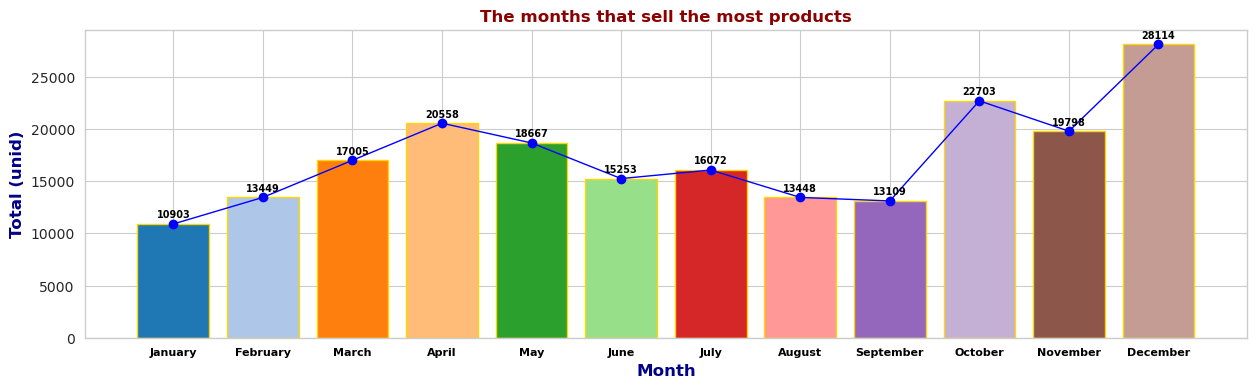

In [ ]:
# We define the months to be able to order them according to these months.
custom_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

df_month_quantity = data_new.groupby('Month')['Quantity_Ordered'].sum().to_frame().reset_index()

df_month_quantity['Month'] = df_month_quantity['Month'].astype(pd.CategoricalDtype(categories=custom_order, ordered=True))
df_month_quantity = df_month_quantity.sort_values('Month', ascending = True)

labels = df_month_quantity.iloc[:,0].to_list()
values = df_month_quantity.iloc[:,1].values

cmap = plt.get_cmap('tab20')
colors = cmap(np.arange(len(labels)))

fig,ax = plt.subplots(figsize = (15,4))
rects = ax.bar(labels, values, linewidth = 1. , edgecolor = 'gold', color = colors)
ax.plot(labels, values, '-o', linewidth = 1., color = 'blue')
ax.set_ylabel('Total (unid)', fontsize = 12, fontweight = 'bold', color = 'darkblue')
ax.set_xlabel('Month', fontsize = 12, fontweight = 'bold', color = 'darkblue')
ax.set_xticklabels(labels, fontsize = 8, fontweight = 'bold')
ax.tick_params('x', labelcolor = 'black')
ax.set_title('The months that sell the most products', fontsize = 12, fontweight = 'bold', color = 'darkred')

def autolabel(rects):
  for rect in rects:
    height = rect.get_height()
    ax.annotate(text = '{}'.format(height),
                xy = (rect.get_x() + rect.get_width()/2, height),
                xytext = (0,3),
                textcoords = 'offset points',
                ha = 'center',
                va = 'bottom',
                weight = 'bold',
                size = 7,
                color = 'black')

autolabel(rects)
fig.show()

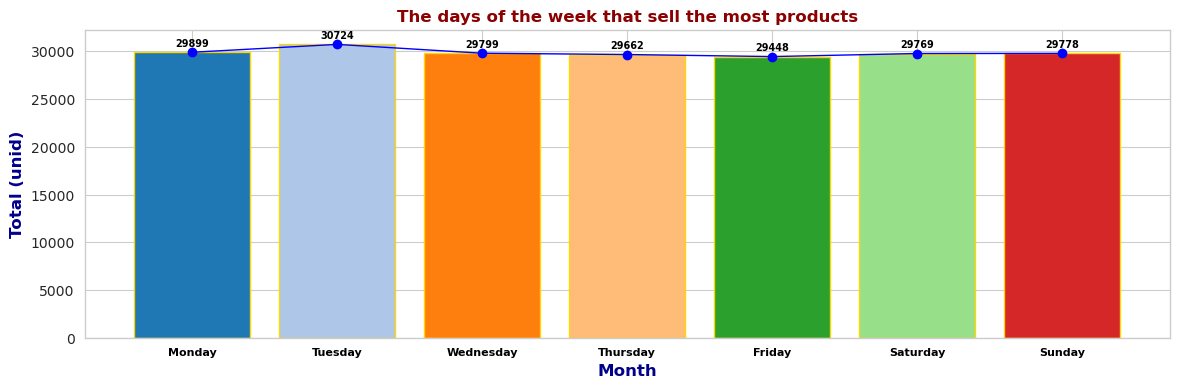

In [ ]:
# We define the days of the week to be able to order them according to these days.
custom_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

df_day_quantity = data_new.groupby('Day')['Quantity_Ordered'].sum().to_frame().reset_index()

df_day_quantity['Day'] = df_day_quantity['Day'].astype(pd.CategoricalDtype(categories=custom_order, ordered=True))
df_day_quantity = df_day_quantity.sort_values('Day', ascending = True)

labels = df_day_quantity.iloc[:,0].to_list()
values = df_day_quantity.iloc[:,1].values

cmap = plt.get_cmap('tab20')
colors = cmap(np.arange(len(labels)))

fig,ax = plt.subplots(figsize = (14,4))
rects = ax.bar(labels, values, linewidth = 1. , edgecolor = 'gold', color = colors)
ax.plot(labels, values, '-o', linewidth = 1., color = 'blue')
ax.set_ylabel('Total (unid)', fontsize = 12, fontweight = 'bold', color = 'darkblue')
ax.set_xlabel('Month', fontsize = 12, fontweight = 'bold', color = 'darkblue')
ax.set_xticklabels(labels, fontsize = 8, fontweight = 'bold')
ax.tick_params('x', labelcolor = 'black')
ax.set_title('The days of the week that sell the most products', fontsize = 12, fontweight = 'bold', color = 'darkred')

def autolabel(rects):
  for rect in rects:
    height = rect.get_height()
    ax.annotate(text = '{}'.format(height),
                xy = (rect.get_x() + rect.get_width()/2, height),
                xytext = (0,3),
                textcoords = 'offset points',
                ha = 'center',
                va = 'bottom',
                weight = 'bold',
                size = 7,
                color = 'black')

autolabel(rects)
fig.show()

In [ ]:
# We order our data according to the date of purchase.
data_new_ordered = data_new.sort_values('Order_Date', ascending = True)

data_new_ordered = data_new_ordered.set_index('Order_Date')
data_new_ordered.head()

,Order_ID,Product,Product_ean,catégorie,Purchase_Address,Quantity_Ordered,Price_Each,Cost_price,turnover,margin,Hour,Day,Month,Year
Order_Date,,,,,,,,,,,,,,
2019-01-01 03:07:00,147268,Wired Headphones,4.648137e+12,Sports,"9 Lake St, New York City, NY 10001",1,11.99,5.995,11.99,5.995,3,Tuesday,January,2019
2019-01-01 03:40:00,148041,USB-C Charging Cable,9.042705e+12,Vêtements,"760 Church St, San Francisco, CA 94016",1,11.95,5.975,11.95,5.975,3,Tuesday,January,2019
2019-01-01 04:56:00,149343,Apple Airpods Headphones,7.725490e+12,Sports,"735 5th St, New York City, NY 10001",1,150.00,97.500,150.00,52.500,4,Tuesday,January,2019
2019-01-01 05:53:00,149964,AAA Batteries (4-pack),6.453768e+12,Vêtements,"75 Jackson St, Dallas, TX 75001",1,2.99,1.495,2.99,1.495,5,Tuesday,January,2019
2019-01-01 06:03:00,149350,USB-C Charging Cable,1.826840e+12,Sports,"943 2nd St, Atlanta, GA 30301",2,11.95,5.975,23.90,11.950,6,Tuesday,January,2019


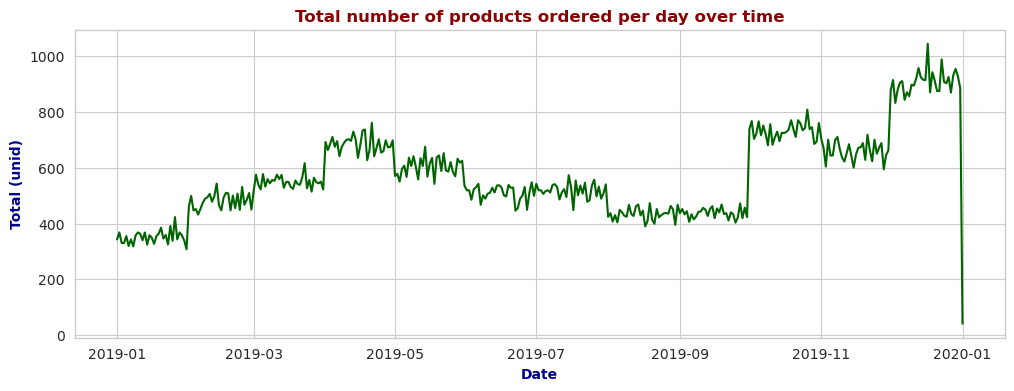

In [ ]:
# We generated a resample to group them by day.
df_day_resample = data_new_ordered.Quantity_Ordered.resample('D').sum().to_frame()

fig, ax = plt.subplots(figsize = (12,4))
ax.plot(df_day_resample.index, df_day_resample.iloc[:,0], color = 'darkgreen')
ax.set_ylabel('Total (unid)', fontsize = 10, fontweight = 'bold', color = 'darkblue')
ax.set_xlabel('Date', fontsize = 10, fontweight = 'bold', color = 'darkblue')
ax.set_title('Total number of products ordered per day over time', fontsize = 12, fontweight = 'bold', color = 'darkred')
fig.show()

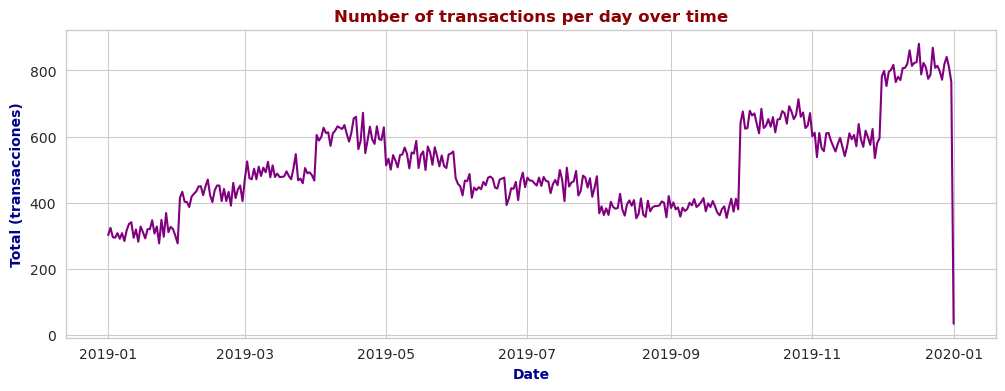

In [ ]:
# We generated a resample to group them by day.
df_day_transac_resample = data_new_ordered.resample('D').size().to_frame()

fig, ax = plt.subplots(figsize = (12,4))
ax.plot(df_day_transac_resample.index, df_day_transac_resample.iloc[:,0], color = 'purple')
ax.set_ylabel('Total (transacciones)', fontsize = 10, fontweight = 'bold', color = 'darkblue')
ax.set_xlabel('Date', fontsize = 10, fontweight = 'bold', color = 'darkblue')
ax.set_title('Number of transactions per day over time', fontsize = 12, fontweight = 'bold', color = 'darkred')
fig.show()

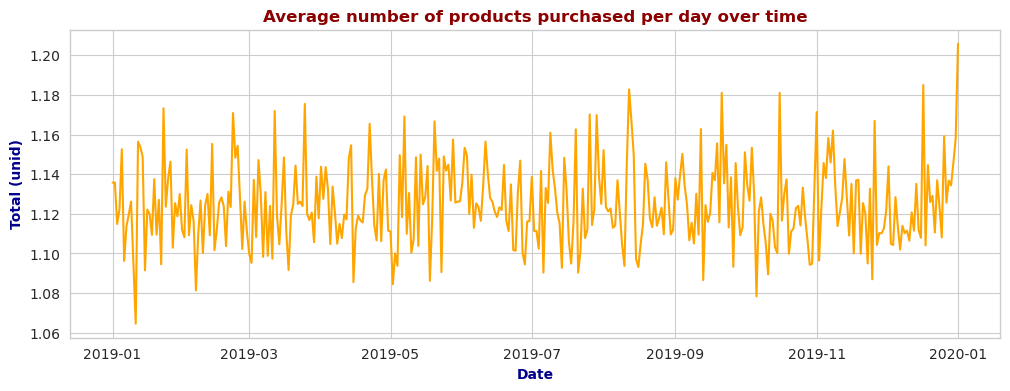

In [ ]:
# We generated a resample to group them by day.
df_day_resample_mean = data_new_ordered.Quantity_Ordered.resample('D').mean().to_frame()

fig, ax = plt.subplots(figsize = (12,4))
ax.plot(df_day_resample_mean.index, df_day_resample_mean.iloc[:,0], color = 'orange')
ax.set_ylabel('Total (unid)', fontsize = 10, fontweight = 'bold', color = 'darkblue')
ax.set_xlabel('Date', fontsize = 10, fontweight = 'bold', color = 'darkblue')
ax.set_title('Average number of products purchased per day over time', fontsize = 12, fontweight = 'bold', color = 'darkred')
fig.show()